# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

*Приступим. Посмотрим на данные, выведем первые пять строк таблицы:*

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


*Из таблицы видно, что строки таблицы разделены символом **"\t"**, поэтому все значения слились в одну единую строку. Разделим строки, применив аргумент **"sep"** со значением **"\t"**:*

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


*Теперь выведем общую информацию о таблице. Применим метод **info()**:*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

*В таблице df 22 колоноки и 23699 строк. В таблице 3 целочисленных столбца, 3 столбца строчного типа, 14 столбцов вещественного типа и 2 столбца логическогого типа. В столбцах ceiling_height, floors_total, living_area,  is_apartment, kitchen_area, balcony, locality_name, airports_nearest , cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition пропущены значения.*

### Шаг 2. Предобработка данных

*Посмотрим, какой процент пропущеных значений в каждом столбце. Пременим конструкцию **".isna().mean()"**:*

In [5]:
df.isna().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**==================================================================================================================**

*Посмотрим на столбец ceiling_height (высота потолков (м)). В столбце ceiling_height пропущено 38% значений. Выведем основные данные с помощью метода **.describe()**:*

In [6]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

*Из вывода видно, что в данных присутствуют выбросы (высота потолков 1 и 100 метров, как минимальное и максимальное значения),  поэтому среднее арифметическое не подходит для заполнения пропусков. Медиана соответствует стандартной высоте потолков 2.65м. Заполним пропущеные значения медианой:*

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

**==================================================================================================================**

*Посмотрим на столбец floors_total (всего этажей в доме). В столбце floors_total пропущено 0.3% значений. Точно определить этаж, по косвенным признакам, у нас не получится и процент пропущеных значений не большой. Поэтому подставим в пустые значения заполнитель (в качестве заполнителя используем значение 0). Заполним пустые значения:* 

In [8]:
df['floors_total'] = df['floors_total'].fillna(0)

**==================================================================================================================**

*Посмотрим на столбец kitchen_area (площадь кухни в квадратных метрах (м²)). В столбце kitchen_area пропущено 9% значений. Попробуем определить размер кухни с помощью столбца total_area (площадь квартиры в квадратных метрах (м²)). Построим гистограмму для столбца total_area, при условии, что столбец kitchen_area будет равен NaN:*

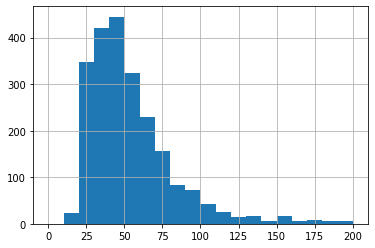

In [9]:
df[df['kitchen_area'].isna()]['total_area'].hist(bins=20, range=(0, 200))

*Из графика видно, что основная масса пропущеных значений приходится на диапазон от 10 до 150 м², столбца total_area. Посчитаем, какой процент пропущенных значений покрывает этот диапазон:*

In [10]:
df.query('kitchen_area.isna() and (total_area >= 10 and total_area <= 150)')['total_area'].count() / df['kitchen_area'].isna().sum() * 100

97.01492537313433

*Количество пропущеных значений столбца kitchen_area, в заданом диапазоне столбца total_area, составляет 97%. Разобьем весь диапазон на 5 категорий (от 10 до 20, от 20 до 40, от 40 до 80, от 80 до 150 и от 150 до inf). Присвоим медиану каждой категории в пропущенных значених в зависимости от диапазона:*

In [11]:
df.loc[(df['total_area'] >= 10) & (df['total_area'] < 20), 'kitchen_area'] = df.fillna(df.query('total_area >= 10 and total_area < 20')['kitchen_area'].median())

In [12]:
df.loc[(df['total_area'] >= 20) & (df['total_area'] < 40), 'kitchen_area'] = df.fillna(df.query('total_area >= 20 and total_area < 40')['kitchen_area'].median())

In [13]:
df.loc[(df['total_area'] >= 40) & (df['total_area'] < 80), 'kitchen_area'] = df.fillna(df.query('total_area >= 40 and total_area < 80')['kitchen_area'].median())

In [14]:
df.loc[(df['total_area'] >= 80) & (df['total_area'] < 150), 'kitchen_area'] = df.fillna(df.query('total_area >= 80 and total_area < 150')['kitchen_area'].median())

In [15]:
import numpy as np
df.loc[(df['total_area'] >= 150) & (df['total_area'] < np.inf), 'kitchen_area'] = df.fillna(df.query('total_area >= 150 and total_area < inf')['kitchen_area'].median())

*Средняя кухня:*
   - *В диапазоне от 10 до 20 составляет 2.7м²*
   - *В диапазоне от 20 до 40 составляет 8.1м²*
   - *В диапазоне от 40 до 80 составляет 9.0м²*
   - *В диапазоне от 80 до 150 составляет 13.6м²*
   - *В диапазоне от 150 до inf составляет 20.0м²*

**==================================================================================================================**

*Посмотрим на столбец living_area (жилая площадь в квадратных метрах(м²)). В столбце living_area пропущено 8% значений. Попробуем, также как со столбцом kitchen_area, найти значения пропущеных строк через столбец living_area, через столбец total_area. Построим гистограмму для столбца total_area, при условии, что столбец living_area будет равен NaN:*

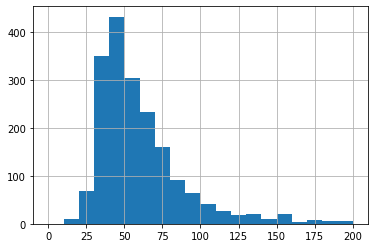

In [16]:
df[df['living_area'].isna()]['total_area'].hist(bins=20, range=(0, 200))

*Из графика видно, что основная масса пропущеных значений приходится на диапазон от 10 до 150 м² столбца total_area. Посчитаем, какой процент пропущенных значений покрывает этот диапазон:*

In [17]:
df.query('living_area.isna() and (total_area > 10 and total_area < 150)')['total_area'].count() / df['living_area'].isna().sum() * 100

96.32159747766684

*Колличество пропущеных значений столбца living_area, в заданном диапазоне столбца total_area, составляет 96%. Разобьем весь диапазон на 5 категорий (от 10 до 20, от 20 до 40, от 40 до 80, от 80 до 150 и от 150 до inf). Присвоим медиану каждой категории в пропущенных значениях в зависимости от диапазона:*

In [18]:
df.loc[(df['total_area'] >= 10) & (df['total_area'] < 20), 'living_area'] = df.fillna(df.query('total_area >= 10 and total_area < 20')['living_area'].median())

In [19]:
df.loc[(df['total_area'] >= 20) & (df['total_area'] < 40), 'living_area'] = df.fillna(df.query('total_area >= 20 and total_area < 40')['living_area'].median())

In [20]:
df.loc[(df['total_area'] >= 40) & (df['total_area'] < 80), 'living_area'] = df.fillna(df.query('total_area >= 40 and total_area < 80')['living_area'].median())

In [21]:
df.loc[(df['total_area'] >= 80) & (df['total_area'] < 150), 'living_area'] = df.fillna(df.query('total_area >= 80 and total_area < 150')['living_area'].median())

In [22]:
df.loc[(df['total_area'] >= 150) & (df['total_area'] < np.inf), 'living_area'] = df.fillna(df.query('total_area >= 150 and total_area < inf')['living_area'].median())

*Средняя жилая площадь:*
   - *В диапазоне от 10 до 20 составляет 13м²*
   - *В диапазоне от 20 до 40 составляет 17.2м²*
   - *В диапазоне от 40 до 80 составляет 31.0м²*
   - *В диапазоне от 80 до 150 составляет 55.0м²*
   - *В диапазоне от 150 до inf составляет 111.0м²*

**==================================================================================================================**

*Посмотрим на столбец is_apartment (апартаменты). В столбце floors_total пропущено 88% значений. Будем считать, что незаполненные значения - это отрицание того, что данная недвижимость принадлежит к категории апартаменты. Так как столбец имеет логический тип данных, заполним пустые ячейки таблицы значением "False":*

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**==================================================================================================================**

*Посмотрим на столбец balcony (число балконов). В столбце balcony пропущено 48% значений. По аналогии со столбцом is_apartment, будем считать, что незаполненные значения - это отрицание наличия балкона. Заполним пропущенные пустые ячейки таблицы значением "0":*

In [24]:
df['balcony'] = df['balcony'].fillna(0)

**==================================================================================================================**

*Посмотрим на столбец locality_name (название населённого пункта). В столбце locality_name пропущено 0.2% значений. Точно определить населённый пункт (по косвенным признакам) у нас не получится. Заполним пропуски значением "unknown":*

In [25]:
df['locality_name'] = df['locality_name'].fillna('unknown')

**==================================================================================================================**

*Посмотрим на столбцы airports_nearest, cityCenters_nearest, parks_around3000 и ponds_around3000 (расстояние до ближайшего аэропорта в метрах (м), расстояние до центра города (м), число парков в радиусе 3 км, число водоёмов в радиусе 3 км). В столбцах одинаковое количество пропусков составляет 23%, возможно между пропусками есть связь. Составим сводную таблицу, индексом в ней будут значения столбца locality_name. Так как, по условию задания, данная информация заполняется автоматически, возможно она заполняется только для определенных районов, проверим.*

In [26]:
filled_values = (df
     .query('airports_nearest.notna() and cityCenters_nearest.notna() and parks_around3000.notna() and ponds_around3000.notna()')
     .pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'], aggfunc='count')
     .sort_values('airports_nearest', ascending=False)
)

In [27]:
filled_values

,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000
locality_name,,,,
Санкт-Петербург,15636,15636,15636,15636
посёлок Шушары,436,436,436,436
Пушкин,368,368,368,368
Колпино,337,337,337,337
посёлок Парголово,327,327,327,327
Петергоф,201,201,201,201
Сестрорецк,183,183,183,183
Красное Село,176,176,176,176
Ломоносов,132,132,132,132


In [28]:
filled_values.airports_nearest.sum()

18156

In [29]:
18156 / 18181

0.9986249381222155

*Количество заполненых значений в этих районах составляет практически 100% от всех заполненых значений (потому что в столбце airports_nearest на 24 значения заполнено меньше, чем в других столбцах из выборки, данный столбец сужает выборку). Теперь сделаем фильтр. В него войдут те зачения столбца locality_name, которые не входят в индексы нашей предыдущей таблицы и войдут все столбцы из придыдущей таблицы с отсутствующими значениями:*

In [30]:
df.query('not locality_name in @filled_values.index and airports_nearest.isna() and cityCenters_nearest.isna() and parks_around3000.isna() and ponds_around3000.isna()')['total_images'].count()

5386

In [31]:
18156 + 5386

23542

In [32]:
23542 / 23699

0.9933752479007553

*Снова результат достиг почти 100%. Заполнение значений в данных районах происходит потому, что эти районы относятся к пригороду Санкт-Питербурга. Заполним пропущеные значения нулями, так как никакой информации по данным районам у нас нет.*

In [33]:
for i in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']:    
    df.loc[df[i].isna(), i] = df.fillna(0)

*В предыдущем блоке мы заполнили пустые значения столбца locality_name значением unknown, но из таблицы с пригородами Санкт-Питербурга мы видим, что unknown присутствует в ней. Проверим, сколько всего значений unknown:*

In [34]:
df.query('locality_name == "unknown"')['locality_name'].count()

49

*А теперь посмотрим, сколько их в списке с пригородами:*

In [35]:
df.query('locality_name in @filled_values.index and locality_name == "unknown"')['locality_name'].count()

49

*Видно, что все значения относятся к Санкт-Петербургу, либо к его пригороду. Заполним данные значения модой, то-есть Санкт-Петербург:*

In [36]:
df.loc[(df['locality_name'].isin(filled_values.index)) & (df['locality_name'] == 'unknown'), 'locality_name'] = 'Санкт-Петербург'

**==================================================================================================================**

*Теперь посмотрим на столбцы parks_nearest (расстояние до ближайшего парка (м)). В столбце количество пропусков 65%. Попробуем заполнить данный столбец с помощью столбца parks_around3000. Проверим, равно ли количество строк с пропущеными значениями количеству строк столбца parks_around3000 равных нулю.*

In [37]:
df.parks_nearest.isna().sum() == df.query('parks_nearest.isna() and parks_around3000 == 0')['total_images'].count()

True

*Они абсолютно совпадают, а это значит, что расстояние до парка не указано, но указано, что в пределах 3000 метров нет ни одного парка, а значит парков нет. Заполним пустые значения нулями:*

In [38]:
df.loc[df['parks_nearest'].isna(), 'parks_nearest'] = df.fillna(0)

**==================================================================================================================**

*Проделаем тоже самое со столбцом ponds_nearest:*

In [39]:
df.ponds_nearest.isna().sum() == df.query('ponds_nearest.isna() and ponds_around3000 == 0')['total_images'].count()

True

*Тоже самое, они совпадают. Заполним пустые значения нулями:*

In [40]:
df.loc[df['ponds_nearest'].isna(), 'ponds_nearest'] = df.fillna(0)

**==================================================================================================================**

*Посмотрим на столбец days_exposition (сколько дней было размещено объявление от публикации до снятия). В столбце days_exposition пропущено 13% значений. Попробуем заполнить пропущенные данные по дате публикации обявления. Сначала переведем столбец first_day_exposition (дата публикации) в тип "datetime64":*

In [41]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

*Теперь построим гистограмму по столбцу first_day_exposition с условием, что значения столбца days_exposition будут NaN:*

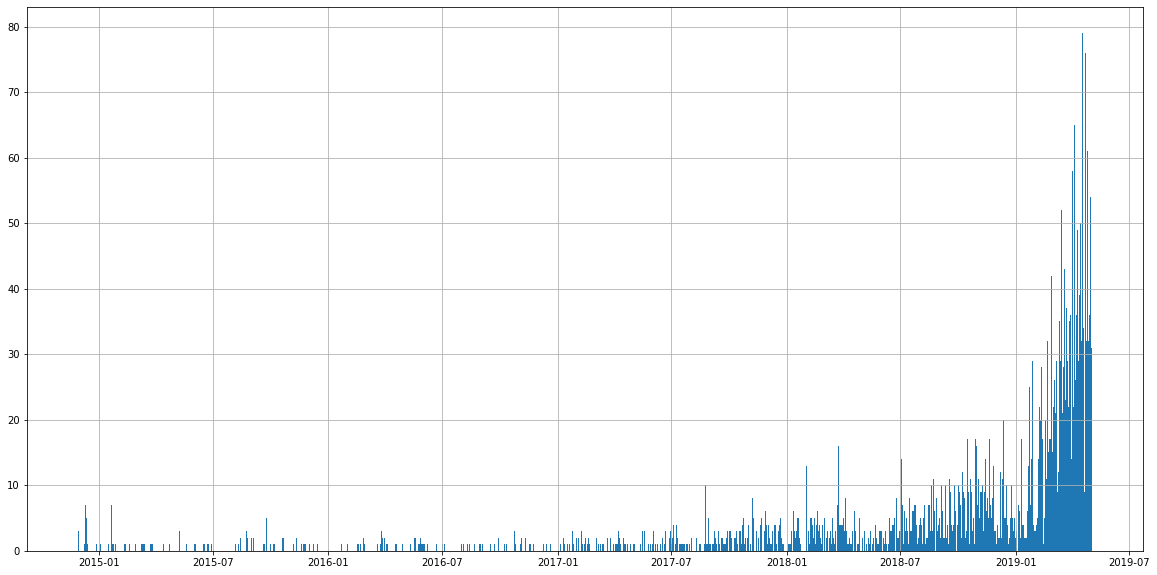

In [42]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df[df['days_exposition'].isna()]['first_day_exposition'].hist(bins=1000, figsize=(20, 10))

*Из гистограммы видно, что основаная масса пропущинных значений приходится на 2018-2019 годы. Выведем медианы для 2019 года, отдельно для 2018 года и отдельно для всех остальных:*

In [43]:
df[df['first_day_exposition'].dt.year == 2019]['days_exposition'].median()

23.000000000000004

In [44]:
df[df['first_day_exposition'].dt.year == 2018]['days_exposition'].median()

64.0

In [45]:
df[(df['first_day_exposition'].dt.year != 2018) & (df['first_day_exposition'].dt.year != 2019)]['days_exposition'].median()

154.0

*Из вывода видно, что медиана по 2019 году составляет всего 23 дня. Такое число получается, потому что в нашей таблице все продажи уже закрыты, предложений, которые на данный момент находятся в продаже, в нашей таблице нет. А значит, имеют место только быстрые продажи, тат как наша таблица заканчивается 05.2019. В 2018 году медиана составляет 64 дня. Здесь присутствуют быстрые и средние продажи. Ну и во всех остальных годах медиана составляет 154 дня. Здессь присутствуют быстрые, средние и медленные продажи. Заполним пропущенные значения медианой соответственно 2019, 2018 и все остальное:*

In [46]:
df.loc[df['first_day_exposition'].dt.year == 2019] = df.fillna(df[df['first_day_exposition'].dt.year == 2019]['days_exposition'].median())

In [47]:
df.loc[df['first_day_exposition'].dt.year == 2018] = df.fillna(df[df['first_day_exposition'].dt.year == 2018]['days_exposition'].median())

In [48]:
df.loc[(df['first_day_exposition'].dt.year != 2018) & (df['first_day_exposition'].dt.year != 2019)] = df.fillna(df[(df['first_day_exposition'].dt.year != 2018) & (df['first_day_exposition'].dt.year != 2019)]['days_exposition'].median())

**==================================================================================================================**

*Изменим тип данных в столбцах:*
- *last_price - изменим тип столбца на целочисленный, так как цены на квартиры не мальенькие, точность до копеек нам вряд ли пригодится.*
- *floors_total - изменим тип столбца на целочисленный, так как общее количество этажей может быть только целым.*
- *balcony - изменим тип столбца на целочисленный, так как общее количество балконов может быть только целым.*
- *airports_nearest - изменим тип столбца на целочисленный, так как растояние указано в метрах, а расстояние в сантиметрах нам не нужно.*
- *cityCenters_nearest - изменим тип столбца на целочисленный, так как растояние указано в метрах, а расстояние в сантиметрах нам не нужно.*
- *parks_around3000 - изменим тип столбца на целочисленный, так как количество парков может быть только целым.*
- *parks_nearest - изменим тип столбца на целочисленный, так как растояние указано в метрах, а расстояние в сантиметрах нам не нужно.*
- *ponds_around3000 - изменим тип столбца на целочисленный, так как количество прудов может быть только целым.*
- *ponds_nearest - изменим тип столбца на целочисленный, так как растояние указано в метрах, а расстояние в сантиметрах нам не нужно.*
- *days_exposition - изменим тип столбца на целочисленный, так как количество дней, сколько объявление было в публикации, может быть только целым.*

In [49]:
type_list = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

In [50]:
for i in type_list:
    df[type_list] = df[type_list].astype('int64')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

### Шаг 3. Посчитайте и добавьте в таблицу

*Цена квадратного метра:*

In [52]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

*Этаж квартиры: первый, последний, другой*

In [53]:
df.loc[df['floor'] == 1, 'category_floors'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'category_floors'] = 'последний'
df.loc[(df['floor'] != df['floors_total']) & (df['floor'] != 1), 'category_floors'] = 'другой'

*Соотношение жилой к общей площади:*

In [54]:
df['residential_and_general'] = df['living_area'] / df['total_area']

*Соотношение площади кухни к общей площади:*

In [55]:
df['kitchen_and_general'] = df['kitchen_area'] / df['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

*Проанализируем значения столбца total_area (площадь квартиры в квадратных метрах) и исключим выбросы. Посмотрим на общие данные с помощью метода ".describe()" и построим  гистограмму:*

In [56]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

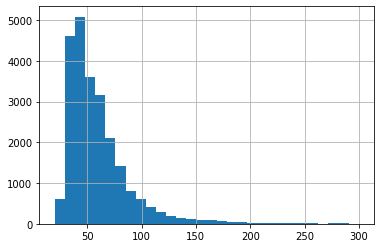

In [57]:
df['total_area'].hist(bins=30, range=(20, 300))

*Из вывода видно, что в таблице присутствуют выбросы (минимальная площадь 12 м², максимальная площадь 900 м², отклонения медианы от средней арифметической). Из гистограммы видно, что основная масса значений приходится на диапазон от 20 до 250 м². Построим гистограмму размаха и проверим гипотезу:*

(0, 400)

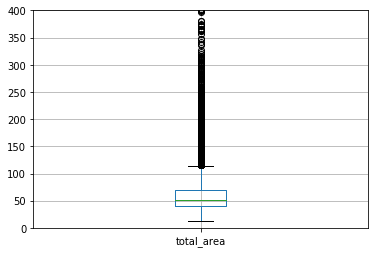

In [58]:
import matplotlib.pyplot as plt 
df.boxplot('total_area')
plt.ylim(0, 400)

*Гистограмма размаха указывает на диапазон от 20 до 300 м², возьмем именно этот диапазон. Посмотрим, какой процент значений охватывает данный диапазон.*

In [59]:
df.query('total_area >= 20 and total_area <= 300')['total_area'].count() / df['total_area'].count()

0.9962867631545634

*В 99% случаев общая площадь занимает от 20 до 300 м². Удалим из таблицы все значения, которые не входят в диапазон.*

In [60]:
df = df.query('total_area >= 10 and total_area <= 300')

**==================================================================================================================**

*Проанализируем значения столбца last_price (цена на момент снятия с публикации) и исключим выбросы. Посмотрим на общие данные с помощью метода ".describe()" и построим гистограмму:*

In [61]:
df['last_price'].describe()

count    2.363800e+04
mean     6.306195e+06
std      7.770379e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.620000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

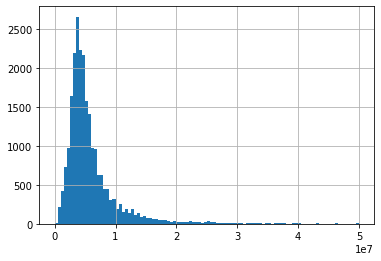

In [62]:
df['last_price'].hist(bins=100, range=(0, 50000000))

*Из вывода видно, что в таблице присутствуют выбросы (минимальная цена 12190р, максимальная цена 763000000р, отклонения медианы от средней арифметической). Из гистограммы видно, что основная масса значений приходится на диапазон от 1000000р до 20000000р. Построим гистограмму размаха и проверим гипотезу:*

(0, 150000000)

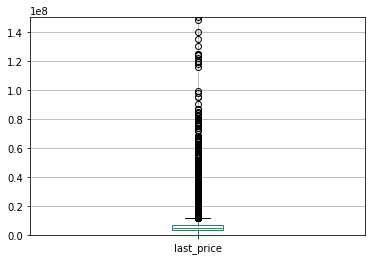

In [63]:
df.boxplot('last_price')
plt.ylim(0, 150000000)

(0, 5000000)

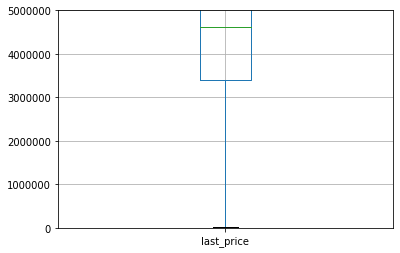

In [64]:
df.boxplot('last_price')
plt.ylim(0, 5000000)

*Гистограмма размаха указывает на диапазон 1000000р до 100000000р, возьмем именно этот диапазон, он выглядит более реальным для рынка недвижимости. Посмотрим, какой процент значений охватывает данный диапазон.*

In [65]:
df.query('last_price >= 1000000 and last_price <= 100000000')['last_price'].count() / df['last_price'].count()

0.9895930281749725

*В 98% случаев цена занимает от 1000000р до 100000000р. Удалим из таблицы все значения, которые не входят в диапазон.*

In [66]:
df = df.query('last_price >= 1000000 and last_price <= 100000000')

**==================================================================================================================**

*Проанализируем значения столбца rooms (число комнат) и исключим выбросы. Посмотрим на общие данные с помощью метода ".describe()" и построим гистограмму:*

In [67]:
df['rooms'].describe()

count    23392.000000
mean         2.060662
std          1.044905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

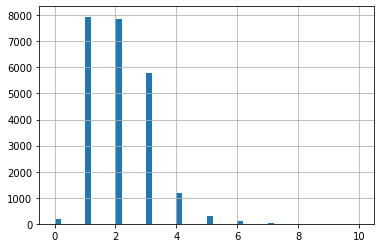

In [68]:
df['rooms'].hist(bins=50, range=(0, 10))

*Из вывода видно, что в таблице присутствуют выбросы (минимальное количество комнат 0, максимальное количество комнат 19). Из гистограммы видно, что основная масса значений приходится на диапазон от 1 до 6 комнат. Построим гистограмму размаха и проверим гипотезу:*

(-3, 10)

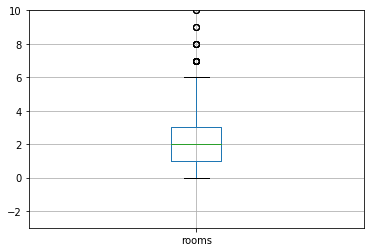

In [69]:
df.boxplot('rooms')
plt.ylim(-3, 10)

*Гистограмма размаха указывает на диапазон от 1 до 6 комнат. Посмотрим, какой процент значений охватывает данный диапазон.*

In [70]:
df.query('rooms >= 1 and rooms <= 6')['rooms'].count() / df['rooms'].count()

0.9890560875512996

*В 98% случаев количество комнат составляет от 1 до 6. Сохраним в переменную range_rooms данный диапазон значений и будем использовать эту переменную в дальнейших расчетах.*

In [71]:
df = df.query('rooms >= 1 and rooms <= 6')

**==================================================================================================================**

*Проанализируем значения столбца ceiling_height (высота потолков) и исключим выбросы. Посмотрим на общие данные с помощью метода ".describe()" и построим гистограмму:*

In [72]:
df['ceiling_height'].describe()

count    23136.000000
mean         2.721253
std          0.985038
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

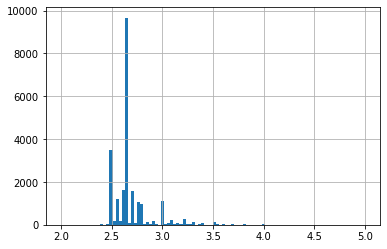

In [73]:
df['ceiling_height'].hist(bins=100, range=(2, 5))

*Из вывода видно, что в таблице присутствуют выбросы (минимальная высота потолков 1 м, максимальная высота потолков 100 м). Из гистограммы видно, что основная масса значений приходится на диапазон от 2.5 до 3.5 метров высоты потолков. Построим гистограмму размаха и проверим гипотезу:*

(2, 6)

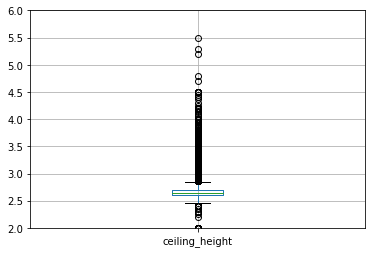

In [74]:
df.boxplot('ceiling_height')
plt.ylim(2, 6)

*Гистограмма размаха указывает на диапазон от 2.5 до 4.5 метров высоты потолков, мы возьмем от 2.5 до 4 метров, возможно в исторической части Санкт-Питербурга есть потолки в 4 метра. Посмотрим, какой процент значений охватывает данный диапазон.*

In [75]:
df.query('ceiling_height >= 2.5 and ceiling_height <= 4')['ceiling_height'].count() / df['ceiling_height'].count()

0.9941217150760719

*В 99% случаев высота потолков составляет от 2.5 до 4 метров. Сохраним в переменную range_ceiling данный диапазон значений и будем использовать эту переменную в дальнейших расчетах.*

In [76]:
df = df.query('ceiling_height >= 2.5 and ceiling_height <= 4')

**==================================================================================================================**

*Изучим время продажи квартиры. Посчитаем среднее и медиану. Построим гистограмму.*

In [77]:
df.days_exposition.describe()

count    23000.000000
mean       163.973130
std        209.943057
min          1.000000
25%         35.000000
50%         80.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

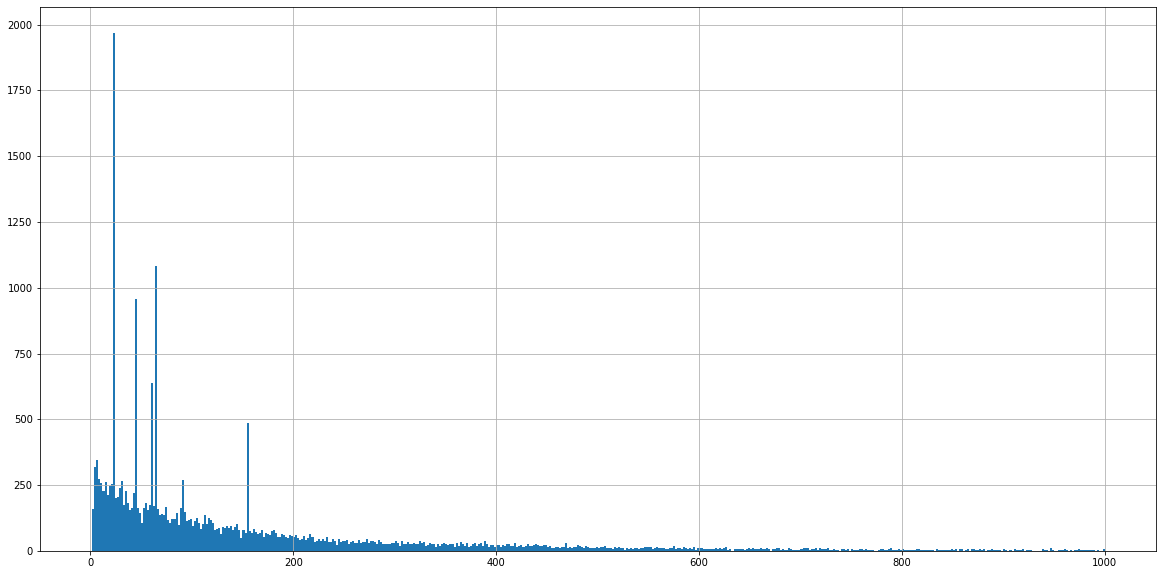

In [78]:
df.days_exposition.hist(bins=500, range=(0, 1000), figsize=(20, 10))

*Из вывода видно, что среднее арифметическое в два раза больше медианы, выбросы присутствуют в максимальном значении 1580. Из гистограммы видно, что основная масса значений приходится на диапазон от 1 до 1000 дней. Построим гистограмму размаха и определим диапазон быстрых, средних и медленных продаж:*

(0, 1600)

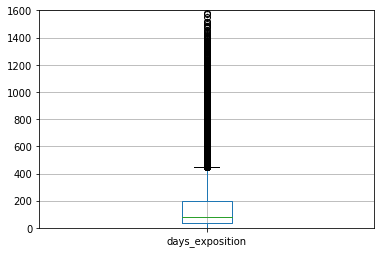

In [79]:
df.boxplot('days_exposition')
plt.ylim(0, 1600)

*Посмотрим на значения более детально:*

(0, 50)

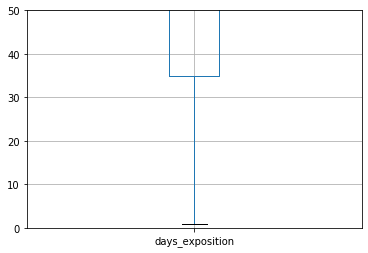

In [80]:
df.boxplot('days_exposition')
plt.ylim(0, 50)

*Из гистограммы размаха видно, что быстрые продажи лежат в диапазоне от 1 до 35 дней.*

(30, 300)

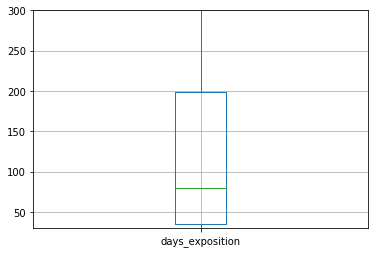

In [81]:
df.boxplot('days_exposition')
plt.ylim(30, 300)

*Из гистограммы размаха видно, что средние продажи лежат в диапазоне от 35 до 200 дней.*

(150, 2000)

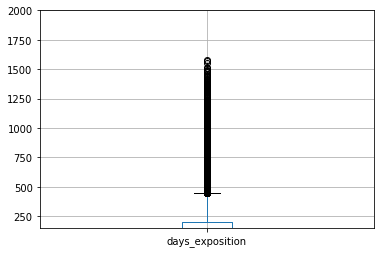

In [82]:
df.boxplot('days_exposition')
plt.ylim(150, 2000)

*Из гистограммы размаха видно, что медленные продажи лежат в диапазоне от 200 до 1500 дней, но мы возмем значения от 200 до 700 дней. Посмотрим какой процент, от всех значений, составляет данный диапазон:*

In [83]:
df.query('days_exposition >= 3 and days_exposition <= 700')['days_exposition'].count() / len(df)

0.9637391304347827

*Продажи, которые прошли быстрее чем за 3 дня, будем считать необычайно быстрыми, а те, которые проходили дольше, чем 500 дней - будем считать необычайно долгими. Создадим переменную range_days_exposition (диапазон продаж), в расчетах будем использовать этот диапазон.*

In [84]:
df = df.query('days_exposition >= 3 and days_exposition <= 700')

**==================================================================================================================**

*Посмотрим, зависит ли цена от количества квадратных метров. Построим график:* 

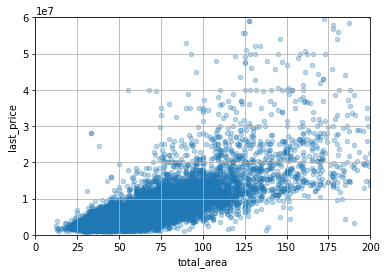

In [85]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 200), ylim=(0, 60000000), grid=True)

*Из графика видно, что в диапазоне от 20 до 75 квадратных метров, цена не очень сильно зависит от квадратного метра - она может варьироваться от 1 милиона до 15, в редких случаях выше. Начиная с 75 квадратных метров и выше - наблюдается рост цен при увеличении квадратных метров. Посчитаем коэффициент корреляции:*

In [86]:
df.last_price.corr(df.total_area)

0.7503179875696795

*Коэффицеент корриляции довольно высокий. Зависимость цены от квадратного метра безусловно присутствует.*

**==================================================================================================================**

*Посмотрим зависит ли цена от количества комнат. Построим график:*

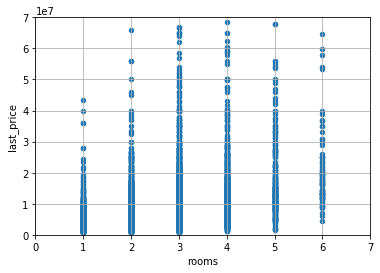

In [87]:
df.plot(x='rooms', y='last_price', kind='scatter', xlim=(0, 7), ylim=(0, 70000000), alpha=1, grid=True)

*Из графика видно, что в диапазоне от 1 до 3 комнат цена может не менятся. От 4 до 6 комнат - начинается изменение цены, но оно не устойчиво, так как от 4 комнат начинается падение цены по верхней границе. Посчитаем коэффициент корреляции:*

In [88]:
df.last_price.corr(df.rooms)

0.44192537654611547

*Коэффицеент корриляции довольно слабый. Зависимость цены от количества комнат присутствует, но она слабая.*

**==================================================================================================================**

*Посмотрим зависит ли цена от этажа. Построим сводную таблицу:*

In [89]:
(df
    .pivot_table(index='category_floors', values='last_price')
    .sort_values(by='last_price', ascending=False)
)

,last_price
category_floors,
другой,6.370133e+06
последний,6.079093e+06
первый,4.754842e+06


*Из таблицы видно, что средняя цена первого этажа самая низкая, первый этаж самый не привлекательный для покупателей. Потом идет цена последнего этажа, цена на него на порядок выше,чем у первого этажа, но ниже среднерыночной цены. Средняя цена в категории "другой" (не первый и не последний) самая высокая. Этаж влияет на цену, если речь идет о первом, последнем или другом этажах.*

**==================================================================================================================**

*Посмотрим, зависит ли цена от удаленности от центра. Построим график на основании словаря filled_values.index, который мы составили в блоке 2, так как только на этой территории есть информация о расстоянии от центра:*

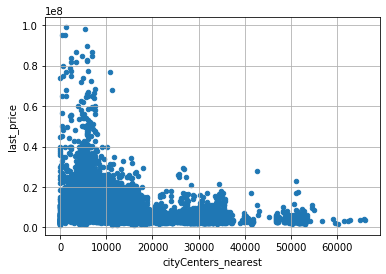

In [90]:
(df
    .query('locality_name in @filled_values.index')
    .plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=1, grid=True)
)

*Из графика видно, что чем ближе к центру, тем выше цена, но низких цен все также много. Посчитаем коэффициент корреляции:*

In [91]:
(df
    .query('locality_name in @filled_values.index')
    .last_price.corr(df.cityCenters_nearest)
)

-0.29679880086094723

*Коэффицеент корриляции довольно слабый. Зависимость цены от удаленности от центра присутствует, но она слабая, возможно это связано с тем, что в центре много ветхого жилья.*

**==================================================================================================================**

*Посмотрим влияет ли сезонный фактор на цену жилья:*

In [92]:
(df
    .query('first_day_exposition.dt.day')
    .pivot_table(index='first_day_exposition', values='last_price')
)

,last_price
first_day_exposition,
2015-07-24,64900000
2015-08-20,5196000
2015-10-01,6800000
2015-10-31,6500000
2016-04-09,8600000
2016-06-23,4400000
2016-06-30,3890000
2016-09-09,4180000
2016-10-29,2950000


*Осенью 2015 года, наблюдается рост цен, который продлится до середины весны, после чего будет спад. Возможно каждую осень поднимаются цены и падают к лету. Далее цена к осени расти не стала, а рост наблюдается ближе к весне. Летом цена снова падает. Ну значит, весной самая большая цена. К осени снова начинается рост, но это уже не закономерность. Ждем большого роста ближе к весне, но нет, весной цена достигает рекордного минимума. Возможно летом цена поставит еще один рекорд падения, но нет, летом цена достигает рекорда максимума, с осени 2015 года. Возможно рост продолжится осенью и будет новый рекорд, но это мало вероятно. Осенью цена снова провалилась. Чего же ждать от зимы, а зимой цена ставит новый рекорд максимума и резко уходит в штопор. Из графика видно, что цена не зависит ни от месяца, ни от сезона, ни от года.*

*Вывод: Самое большое влияние на цену оказывает количество квадратных метров. Затем количество комнат и этаж. Далее - близость к центру, при условии, что это не ветхое и не старое жилье. Ну и самый слабый фактор, влияющий на цену - это сезонность.*

**==================================================================================================================**

*Выберем 10 населённых пунктов с наибольшим числом объявлений. Состамим словарь с названиями этих населённых пунктов, назовем его most_ads:*

In [93]:
most_ads = df.groupby('locality_name')['price_per_square_meter'].count().sort_values(ascending=False).head(10).index

*По словарю most_ads выведем среднюю цену квадратного метра в этих населённых пунктах:*

In [94]:
(df
    .query('locality_name in @most_ads')
    .pivot_table(index='locality_name', values='price_per_square_meter')
    .sort_values(by='price_per_square_meter', ascending=False)
)

,price_per_square_meter
locality_name,
Санкт-Петербург,113082.174529
Пушкин,103050.789954
деревня Кудрово,92394.136106
посёлок Парголово,90325.065966
посёлок Мурино,85158.742527
посёлок Шушары,78412.745995
Колпино,75282.176513
Гатчина,69151.721418
Всеволожск,68820.323158


*В нашем списке, самая большая цена за квадратный метр в Санкт-Петербурге, а самая маленькая в Выборге.*

**==================================================================================================================**

*Выясним, какая область входит в центр. Сначала изменим значения столбца с расстоянием до центра, переведем метры в километры и округлим до целых значений:*

In [95]:
df['cityCenters_nearest'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype(int)

*Выделим квартиры в Санкт-Петербурге и посчитаем среднюю цену квадратного метра для каждого километра.*

In [96]:
St_petersburg = (df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest', values='last_price')
    .head(31)
)

In [97]:
St_petersburg

,last_price
cityCenters_nearest,
0,1.546554e+07
1,1.380873e+07
2,1.311573e+07
3,1.060788e+07
4,1.237468e+07
5,1.262107e+07
6,1.273051e+07
7,1.074109e+07
8,8.398073e+06


*Построим график и посмотрим, как цена изменяется от удаленности от центра. Определим границу, где график сильно меняется — это и будет центральная зона:*

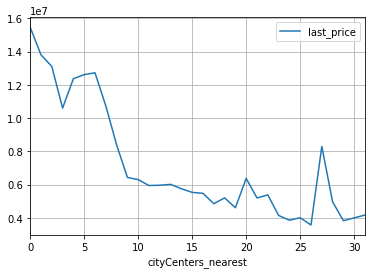

In [98]:
St_petersburg.plot(grid=True)

*В значении восемь, оси абсцисс, цена резко возрастает на два миллиона - это и есть центральная зона. Выделим сегмент квартир в центре, сохраним в переменную center_St_petersburg:*

In [99]:
center_St_petersburg = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 8')

**==================================================================================================================**

*Проанализируем эту территорию и посмотрим, отличается ли она от всего остального города. Сравним общую площадь. Выведем общую информацию и построим гистограмму сравнения:*

In [100]:
center_St_petersburg.total_area.describe()

count    4013.000000
mean       82.216394
std        41.960099
min        12.000000
25%        52.000000
50%        72.700000
75%        99.700000
max       300.000000
Name: total_area, dtype: float64

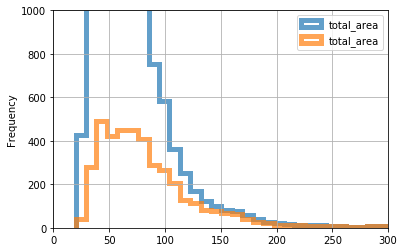

In [101]:
ax = df.plot(kind='hist', y='total_area', bins=30, range=(20, 300), linewidth=5, alpha=0.7, histtype='step', grid=True)
center_St_petersburg.plot(xlim=(0, 300), ylim=(0, 1000), kind='hist', y='total_area', bins=30, range=(20, 300), linewidth=5, alpha=0.7, histtype='step', grid=True, ax=ax)

*Общая площадь на данной территории больше, чем в среднем по рынку. Медиана составляет 72.7 метра, против 52 по рынку. В центре больше жилья с площадью более 250 квадратных метров. Длинный хвост на гистограмме указывает на этот факт.*

**==================================================================================================================**

*Сравним цену на момент снятия с публикации. Выведем общую информацию и построим гистограмму сравнения:*

In [102]:
center_St_petersburg.last_price.describe()

count    4.013000e+03
mean     1.169880e+07
std      1.060418e+07
min      1.600000e+06
25%      6.047550e+06
50%      8.500000e+06
75%      1.285000e+07
max      9.900000e+07
Name: last_price, dtype: float64

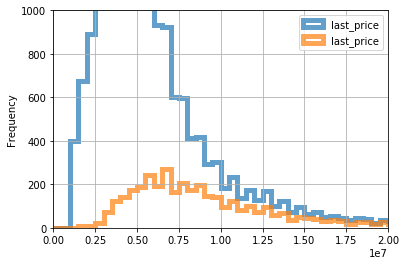

In [103]:
ax = df.plot(kind='hist', y='last_price', bins=100, range=(0, 50000000), linewidth=5, alpha=0.7, histtype='step', grid=True)
center_St_petersburg.plot(xlim=(0, 20000000), ylim=(0, 1000), kind='hist', y='last_price', bins=100, range=(0, 50000000), ax=ax, linewidth=5, alpha=0.7, histtype='step', grid=True)

*Цена в центре выше, чем в целом по рынку. Медиана поднялась с 4.6 мил до 8.5 мил.*

**==================================================================================================================**

*Сравним количество комнат. Выведем общую информацию и построим гистограмму сравнения:*

In [104]:
center_St_petersburg.rooms.describe()

count    4013.000000
mean        2.597807
std         1.155297
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

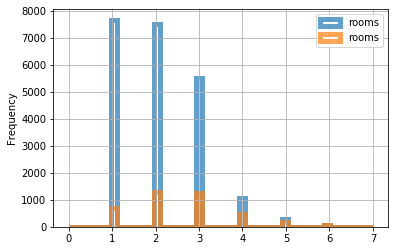

In [105]:
ax = df.plot(kind='hist', y='rooms', bins=50, range=(0, 7), linewidth=5, alpha=0.7, histtype='step', grid=True)
center_St_petersburg.plot(kind='hist', y='rooms', bins=50, range=(0, 7), linewidth=5, alpha=0.7, histtype='step', grid=True, ax=ax)

*Среднее количество комнат в центре увеличилось. Медиана поднялась с 2 до 3 комнат.*

**==================================================================================================================**

*Сравним высоту потолков. Выведем общую информацию и построим гистограмму сравнения:*

In [106]:
center_St_petersburg.ceiling_height.describe()

count    4013.000000
mean        2.882933
std         0.312236
min         2.500000
25%         2.650000
50%         2.750000
75%         3.050000
max         4.000000
Name: ceiling_height, dtype: float64

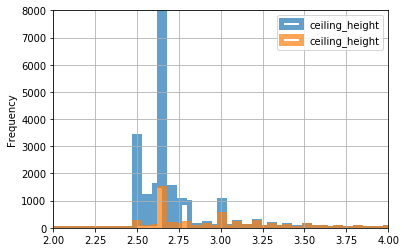

In [107]:
ax = df.plot(kind='hist', y='ceiling_height', bins=100, range=(2, 5), linewidth=5, alpha=0.7, histtype='step', grid=True)
center_St_petersburg.plot(xlim=(2, 4), ylim=(0, 8000), kind='hist', y='ceiling_height', bins=100, range=(2, 5), linewidth=5, alpha=0.7, histtype='step', grid=True, ax=ax)

*Средняя высота потолков увеличилась. Медиана поднялась с 2.65 до 2.75 метров.*

*Вывод: в центральной части все средние показатели больше, чем в целом по рынку.*

**==================================================================================================================**

*Посмотрим, зависит ли цена от количества квадратных метров в центральной части. Построим график:*

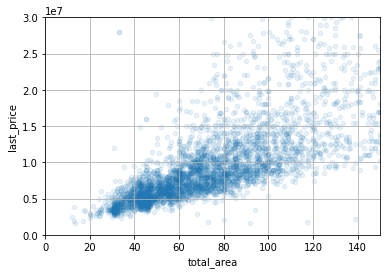

In [108]:
center_St_petersburg.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 150), ylim=(0, 30000000), grid=True)

In [109]:
center_St_petersburg.last_price.corr(center_St_petersburg.total_area)

0.7138547536956407

*Коэффециент корреляции ниже, чем в целом по рынку. Возможно, это связано с тем, что центральная часть привлекательна сама по себе, а остальные факторы играют меньшую роль. Но, все таки, коэффициент высокий и существенно влияющий на стоимость квартиры.*

**==================================================================================================================**

*Сравним количество комнат в центральной части. Построим гистограмму для сравнения:*

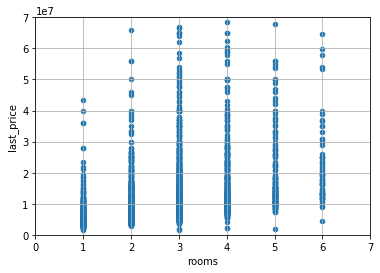

In [110]:
center_St_petersburg.plot(x='rooms', y='last_price', kind='scatter', xlim=(0, 7), ylim=(0, 70000000), grid=True)

In [111]:
df.last_price.corr(df.rooms)

0.44192537654611547

*Коэффициент корреляции количества комнат ни чем не отличается от коэффициента вцелом по рынку. Также, как и в целом по рынку коэффициент слабый.*

**==================================================================================================================**

*Посмотрим, зависит ли цена от этажа. Построим сводную таблицу:*

In [112]:
(center_St_petersburg
    .pivot_table(index='category_floors', values='last_price')
    .sort_values(by='last_price', ascending=False)
)

,last_price
category_floors,
другой,1.219305e+07
последний,1.191875e+07
первый,8.062338e+06


*Также, как и в целом по рынку, цена на первый и последний этажи ниже, чем на средние. Цена на первый этаж существенно ниже, чем на последний.*

**==================================================================================================================**

*Цена в центре формируется точно также, как и в целом по рынку. В первую очередь цена формируется за счет того, что это центр. Это главный фактор формирования цены для данной территории.*

### Шаг 5. Общий вывод

*Самое большое влияние на цену оказывает количество квадратных метров. Затем количество комнат и этаж. Далее близость к центру, при условии, что это не ветхое, старое жилье. Ну и самый слабый фактор, влияющий на цену - это сезонность.*